Media miedo inicial: 0.527474313161348
-----------------------------------------------------------------------
Generacion 0


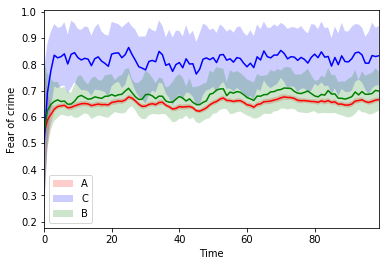

Media de crimen:0.6824798152480189
Homofilia: 0.344960064705
Puntaje Generacion 0.589025706199626
-----------------------------------------------------------------------
Generacion 1


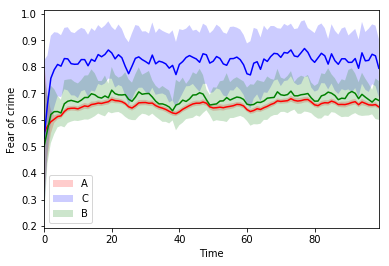

Media de crimen:0.6808021153409182
Homofilia: 0.343923909744
Puntaje Generacion 0.5929329617755673
-----------------------------------------------------------------------
Generacion 2


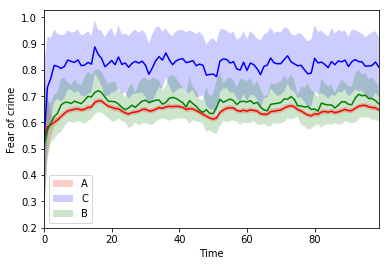

Media de crimen:0.6859056675841012
Homofilia: 0.347351395067
Puntaje Generacion 0.5954513189814882
-----------------------------------------------------------------------
Generacion 3


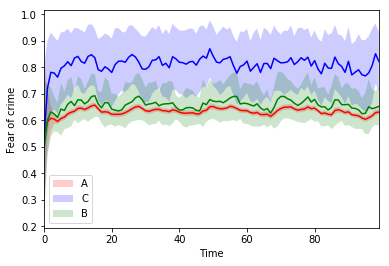

Media de crimen:0.6699723871466972
Homofilia: 0.351660479583
Puntaje Generacion 0.5984353781645017
-----------------------------------------------------------------------
Generacion 4


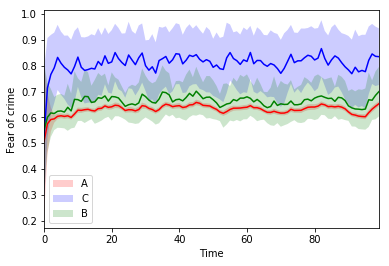

Media de crimen:0.6594297187099797
Homofilia: 0.352491961415
Puntaje Generacion 0.6013256925320921
-----------------------------------------------------------------------
Generacion 5


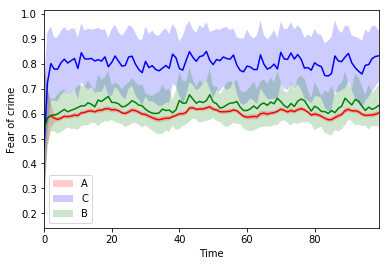

Media de crimen:0.6404163162750146
Homofilia: 0.369929364279
Puntaje Generacion 0.6040714919324802
-----------------------------------------------------------------------
Generacion 6


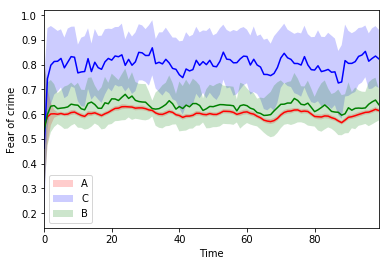

Media de crimen:0.6428254342767092
Homofilia: 0.369929364279
Puntaje Generacion 0.6063497011841003
-----------------------------------------------------------------------
Generacion 7


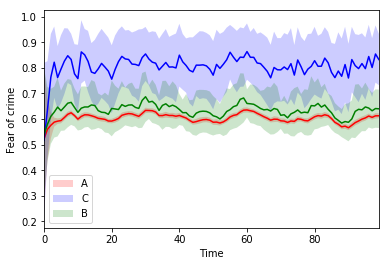

Media de crimen:0.644458555125131
Homofilia: 0.375371680509
Puntaje Generacion 0.6087956622710577
-----------------------------------------------------------------------
Generacion 8


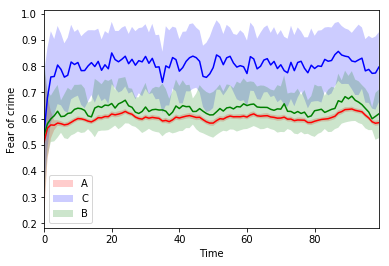

Media de crimen:0.6331133263947729
Homofilia: 0.36747169055
Puntaje Generacion 0.6114253965870237
-----------------------------------------------------------------------
Generacion 9


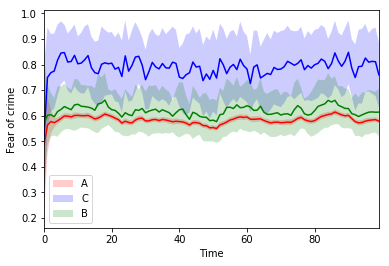

Media de crimen:0.6358965178712811
Homofilia: 0.372972972973
Puntaje Generacion 0.6134019340036146
-----------------------------------------------------------------------
Generacion 10


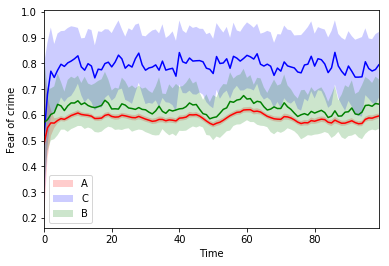

Media de crimen:0.6325416665946146
Homofilia: 0.372972972973
Puntaje Generacion 0.6156709325712664
-----------------------------------------------------------------------
Generacion 11


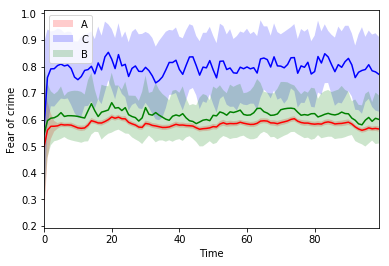

Media de crimen:0.6231642074939119
Homofilia: 0.381258284899
Puntaje Generacion 0.6174748701247575
-----------------------------------------------------------------------
Generacion 12


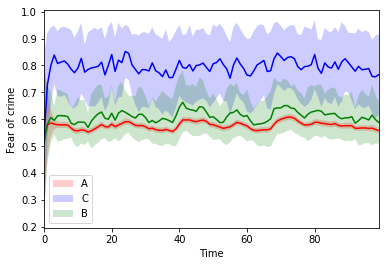

Media de crimen:0.6113502069147587
Homofilia: 0.38197292863
Puntaje Generacion 0.6191043926652268
-----------------------------------------------------------------------
Generacion 13


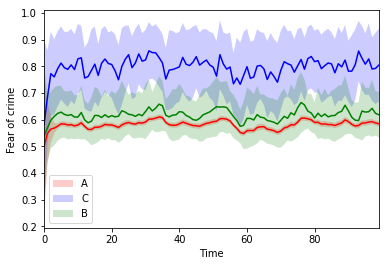

Media de crimen:0.6158596755669198
Homofilia: 0.382448979592
Puntaje Generacion 0.6215371297921967
-----------------------------------------------------------------------
Generacion 14


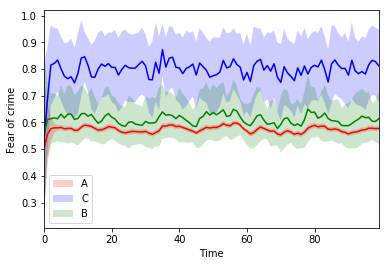

Media de crimen:0.621642312199304
Homofilia: 0.387753026142
Puntaje Generacion 0.6232490861043889
////////////////////////////////////////////////////////////////


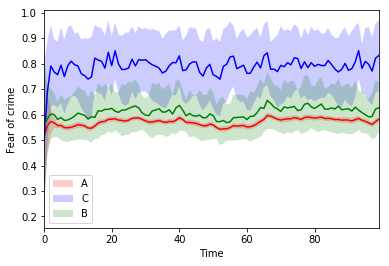

Media de crimen:0.602896256881713
Homofilia: 0.383806412089


In [2]:
from pos import *
nodos=200
crimen=3
min_porcent=0.15
tipo_objetivo="no-h"

#Inicializacion de la poblacion
P=inicializacion(n_estados=150,crimen=crimen,min_porcent=min_porcent,size=nodos)
#Estado inicial miedo al crimen para cada nodo
s0=np.random.rand(nodos)

print("Media miedo inicial: "+ str(np.mean(s0)))

total_generaciones=15
#### for generaciones

for i in range(total_generaciones):
    
    print("-----------------------------------------------------------------------")
    print("Generacion "+ str(i))
    
    puntaje_generacion=[]

    
    for estado in P:
        puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo))
        
    best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
    
    
#     print("Mejor de la Generacion:")
#     print(P[best_cromosome_generation])
    
    media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0)
    
    print("Media de crimen:" + str(media_crimen))
    
    homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))
    
    print("Homofilia: "+str(homo))
    
    print("Puntaje Generacion "+str(np.mean(puntaje_generacion)))


    #funcion densidad de probabilidad para muestrear estados de la poblacion actual que depende de su desempeño
    fdp=seleccion(Poblacion=P,s=s0,tipo=tipo_objetivo)

    #Hijos de la poblacion actual
    Nueva_Generacion=[]

    # Combinacion 
    while len(Nueva_Generacion) != len(P):
        padre1=sample(Poblacion=P,fdp=fdp)
        padre2=sample(Poblacion=P,fdp=fdp)
        hijos=combinacion(state1=padre1,state2=padre2)
        while (validar(state=hijos[0],crimen=crimen,min_porcent=min_porcent) and validar(state=hijos[1],crimen=crimen,min_porcent=min_porcent)) == False:
            hijos=combinacion(state1=padre1,state2=padre2)
        Nueva_Generacion+=hijos

    # Mutacion
    for i in range(len(Nueva_Generacion)):
        Nueva_Generacion[i]=mutacion(Nueva_Generacion[i],crimen)

    # Reemplazo

    total = P+Nueva_Generacion

    fo=[]
    for t in total:
        fo.append(funcion_objetivo(t,s0,tipo_objetivo))
    order=np.argsort(fo)[::-1]
    best=order[:len(P)]
    for i in range(len(P)):
        P[i]=total[best[i]]
print("////////////////////////////////////////////////////////////////")
puntaje_generacion=[]
for estado in P:
    puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo))
best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
# print("Mejor Solucion:")
# print(P[best_cromosome_generation])

media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0)

print("Media de crimen:" + str(media_crimen))

homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))

print("Homofilia: "+str(homo))

In [3]:
for v in convert_matrix_to_vecinos(P[best_cromosome_generation]):
    print(v)
    print("-----------")

[0, 'A', 2, 3, 9, 10, 12, 13, 16, 19, 21, 23, 26, 27, 28, 29, 30, 31, 32, 33, 35, 38, 39, 42, 43, 48, 50, 51, 52, 55, 60, 63, 64, 66, 67, 70, 71, 75, 76, 78, 80, 81, 83, 85, 86, 88, 89, 91, 93, 96, 97, 98, 100, 102, 104, 105, 106, 114, 117, 121, 123, 127, 131, 132, 133, 136, 137, 141, 143, 148, 151, 155, 162, 163, 164, 170, 183, 184, 185, 186, 190, 192, 193, 194, 195, 197, 198]
-----------
[1, 'B', 3, 8, 10, 12, 14, 18, 19, 20, 23, 24, 27, 28, 30, 36, 37, 39, 40, 41, 42, 45, 46, 49, 50, 51, 52, 53, 54, 57, 58, 60, 61, 62, 63, 64, 67, 71, 76, 77, 78, 79, 81, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 104, 105, 108, 110, 112, 113, 116, 117, 118, 120, 123, 125, 127, 128, 129, 130, 133, 134, 137, 138, 139, 140, 142, 144, 146, 148, 152, 153, 154, 155, 157, 160, 162, 163, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 180, 183, 186, 187, 188, 191, 192, 193, 194, 197, 198]
-----------
[2, 'A', 0, 4, 5, 6, 7, 9, 11, 13, 14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 33, 35, 36, 37, 3

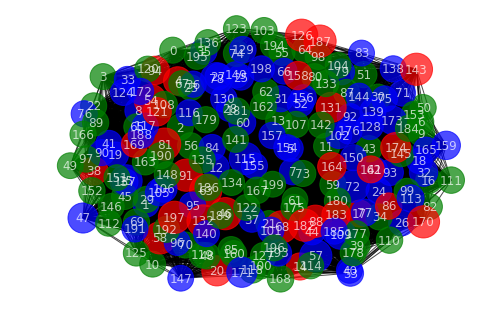

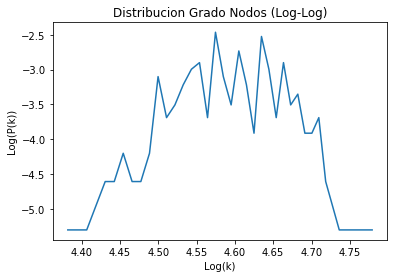

In [4]:
from medidas import *
fear=generate(vertices=convert_matrix_to_vecinos(P[best_cromosome_generation]),
         psi=0.9,
         nu=0.85,
         s=s0)[0][-1]
G=draw_graph(P[best_cromosome_generation],fear)
grafica_grado_nodos(P[best_cromosome_generation])

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 9794
Average degree:  97.9400
Numero minimo de nodos que deben ser removidos para desconectar G :79
average clustering coefficient of G: 0.48
Densidad de G: 0.49216080402
degree assortativity:-0.006284405250019787
assortativity for node attributes: -0.00438842681519


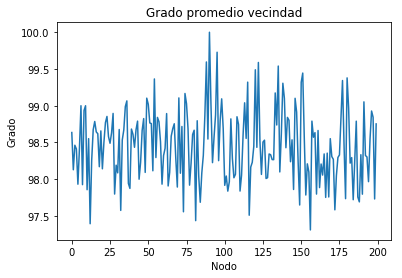

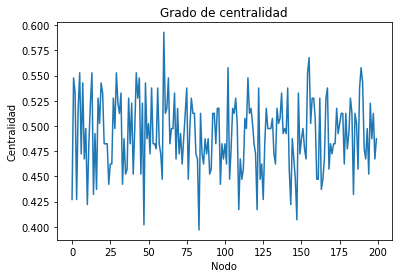

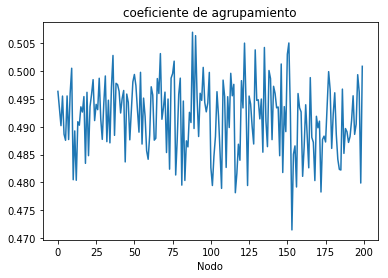

Coeficiente de agrupamiento de G:0.491741407454
Centro de G:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Diametro de G:2


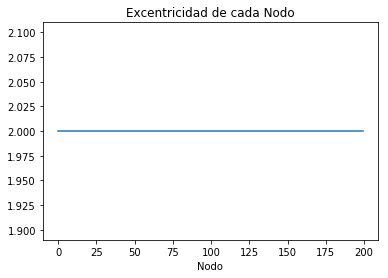

Periferia de G:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Radio de G:2


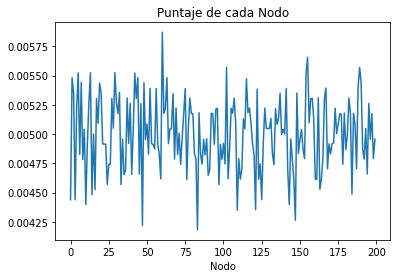

In [ ]:
ver_medidas(G)